
#This part is just transferring txt to csv file, we could use different methods. To run my code, we need to put shooting files in a folder called "shooting_data" and put other files to a folder called "other_data". These two folders should in the same folder, which means they have the same path. The path of the folder will be used later.  

In [ ]:
import pandas as pd


s_1 = 'shooting_data_1.txt'
s_2 = 'shooting_data_2.txt'
p_1 = 'passing_data_1.txt'
p_2 = 'passing_data_2.txt'
csv_file_path = 'shooting_data_1.csv'
csv_file_path2 = 'shooting_data_2.csv'
csv_file_path3 = 'passing_data_1.csv'
csv_file_path4 = 'passing_data_2.csv'
df_s1 = pd.read_csv(s_1, sep=",", header=None,
                 names=["OrientPitch", "OrientYaw", "OrientRoll", "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ",
                        "CorrectedAccelX", "CorrectedAccelY", "CorrectedAccelZ", "CorrectedMagX", "CorrectedMagY", "CorrectedMagZ"])
df_s2 = pd.read_csv(s_2, sep=",", header=None,
                 names=["OrientPitch", "OrientYaw", "OrientRoll", "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ",
                        "CorrectedAccelX", "CorrectedAccelY", "CorrectedAccelZ", "CorrectedMagX", "CorrectedMagY", "CorrectedMagZ"])
df_p1 = pd.read_csv(p_1, sep=",", header=None,
                 names=["OrientPitch", "OrientYaw", "OrientRoll", "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ",
                        "CorrectedAccelX", "CorrectedAccelY", "CorrectedAccelZ", "CorrectedMagX", "CorrectedMagY", "CorrectedMagZ"])
df_p2 = pd.read_csv(p_2, sep=",", header=None,
                 names=["OrientPitch", "OrientYaw", "OrientRoll", "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ",
                        "CorrectedAccelX", "CorrectedAccelY", "CorrectedAccelZ", "CorrectedMagX", "CorrectedMagY", "CorrectedMagZ"])
#create dataframe

df_s1.to_csv(csv_file_path)#create csv file.
df_s1=df_s1.loc[1:]
df_s2.to_csv(csv_file_path2)
df_s2=df_s2.loc[1:]
df_p1.to_csv(csv_file_path3)
df_p1=df_p1.loc[1:]
df_p2.to_csv(csv_file_path4)
df_p2=df_p2.loc[1:]

df_p2

In [ ]:
df_Accel_s1=df_s1[['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]
df_Accel_s2=df_s2[['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]
df_Accel_p1=df_p1[['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]
df_Accel_p2=df_p2[['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]
df_Accel_p2

,CorrectedAccelX,CorrectedAccelY,CorrectedAccelZ
1,-0.9419621,0.0383080,0.2743170
2,-0.9284201,0.0411140,0.2815760
3,-0.9385461,0.0362950,0.2752930
4,-0.9361060,0.0347090,0.2735240
5,-0.9415960,0.0356240,0.2700470
...,...,...,...
5164,-0.9048740,0.1069330,0.4446290
5165,-0.8977370,0.1136430,0.4528640
5166,-0.8810840,0.1104100,0.4536570
5167,-0.8849880,0.1100440,0.4565240


# I don't know why the data type is string, so I have to convert it to float.

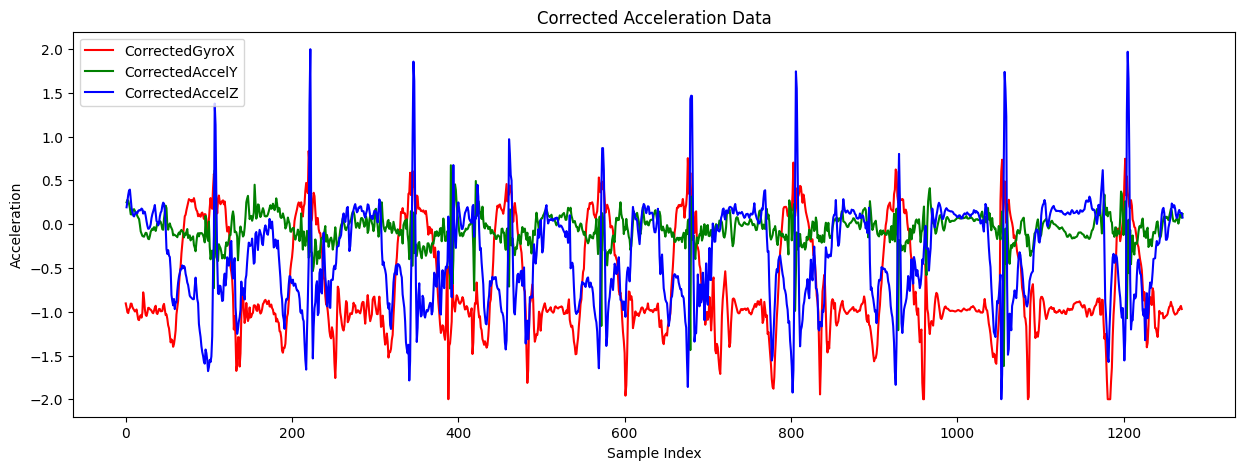

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive'+"/shooting_data/" +'shooting_data_1.csv').loc[1:,['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]
# print(df)
CorrectedAccelX=pd.to_numeric(df['CorrectedAccelX'], errors='coerce').values#convert str to number
CorrectedAccelY=pd.to_numeric(df['CorrectedAccelY'], errors='coerce').values#convert str to number
CorrectedAccelZ=pd.to_numeric(df['CorrectedAccelZ'], errors='coerce').values#convert str to number


index = np.arange(1, len(CorrectedAccelX) + 1)# x axis

plt.figure(figsize=(15, 5)) #figure size

plt.plot(CorrectedAccelX, label='CorrectedGyroX',color='r')
plt.plot(index, CorrectedAccelY, label='CorrectedAccelY',color='g')
plt.plot(index, CorrectedAccelZ, label='CorrectedAccelZ',color='b')


plt.legend()


plt.title('Corrected Acceleration Data')
plt.xlabel('Sample Index')
plt.ylabel('Acceleration')
# plt.yticks([-1,0,1])
plt.show()


# The main part starts *here*

In [1]:
import torch
import os
import numpy as np
import pandas as pd

In [2]:
class SignalDataset(torch.utils.data.Dataset):
    def __init__(self,dir):
        self.signals=[]
        self.shooting_dir=dir+"/shooting_data/"
        self.other_dir=dir+"/other_data/"
        shooting_files     = sorted(os.listdir(self.shooting_dir))
        other_files     = sorted(os.listdir(self.other_dir))
        self.signals=[]
        self.labels=[]
        for i in range(len(shooting_files)):
            print(self.shooting_dir+shooting_files[i])
            df=pd.read_csv(self.shooting_dir+shooting_files[i])
            data=df.loc[1:,['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]

            j=0
            data['CorrectedAccelX']=pd.to_numeric(data['CorrectedAccelX'], errors='coerce')
            data['CorrectedAccelY']=pd.to_numeric(data['CorrectedAccelY'], errors='coerce')
            data['CorrectedAccelZ']=pd.to_numeric(data['CorrectedAccelZ'], errors='coerce')
            data=data.values
            # print(type(data))
            # print(type(data[0]))
            # print((data))
            while(j+100<len(data)):

                cur=data[j:j+100:1]
                self.signals.append(cur)

                self.labels.append(1)
                j=j+5

        for i in range(len(other_files)):
            df=pd.read_csv(self.other_dir+other_files[i])
            data=df.loc[1:,['CorrectedAccelX','CorrectedAccelY','CorrectedAccelZ']]
            data['CorrectedAccelX']=pd.to_numeric(data['CorrectedAccelX'], errors='coerce')
            data['CorrectedAccelY']=pd.to_numeric(data['CorrectedAccelY'], errors='coerce')
            data['CorrectedAccelZ']=pd.to_numeric(data['CorrectedAccelZ'], errors='coerce')
            data=data.values
            # print(type(data))
            # print((data))
            j=0
            while(j+100<len(data)):
                cur=data[j:j+100:1]
                self.signals.append(cur)

                self.labels.append(0)
                j=j+5

        self.length=len(self.signals)
    def __len__(self):
        return self.length

    def __getitem__(self, ind):
        # print(self.labels[ind])
        # print((self.signals[ind]))
        # print(self.signals[ind].shape)
        signal = torch.FloatTensor(self.signals[ind].astype(float))
        label=torch.tensor(self.labels[ind], dtype=torch.long)
        return signal , label



#Put the path of shooting folder and other folder into the parentheses.

---



In [7]:
dataset=SignalDataset('/content/drive/MyDrive')
# data.__getitem__(0)

/content/drive/MyDrive/shooting_data/shooting_data_1.csv
/content/drive/MyDrive/shooting_data/shooting_data_2.csv


In [8]:
!rm -r /content/drive/MyDrive/shooting_data/.ipynb_checkpoints


rm: cannot remove '/content/drive/MyDrive/shooting_data/.ipynb_checkpoints': No such file or directory


In [9]:
type(dataset)

__main__.SignalDataset

#Split data to train, dev and test

In [10]:
from torch.utils.data.dataset import random_split
total_size = len(dataset)  #
split_ratio = 0.9
split_size = int(total_size * split_ratio)
lengths = [split_size, total_size - split_size]
trainset, testset = random_split(dataset, lengths)

split_ratio2=0.9
train_size=(len(trainset))
split_size2 = int(train_size * split_ratio2)
lengths2 = [split_size2, train_size - split_size2]
trainset, devset = random_split(trainset, lengths2)

print(type(trainset))
print(len(trainset))
print(len(testset))
print(len(devset))

<class 'torch.utils.data.dataset.Subset'>
2053
254
229


In [11]:
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    num_workers = 2,
    batch_size=16,
    pin_memory  = True,
    shuffle     = True,
    drop_last=True
)
test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    num_workers = 2,
    batch_size=16,
    pin_memory  = True,
    shuffle     = True,
    drop_last=True
)
dev_loader = torch.utils.data.DataLoader(
    dataset     = devset,
    num_workers = 2,
    batch_size=16,
    pin_memory  = True,
    shuffle     = True,
    drop_last=True
)

#Due to the limitation of computation, I will try to make the model simple with just a few CNN modules.



In [12]:
import torch.nn as nn

# class myModel(nn.Module):

#     def __init__(self):
#         super(myModel, self).__init__()
#         self.conv1 = nn.Conv1d(
#             3, 10, kernel_size=5, stride=2, padding=1, bias=False
#         )
#         self.conv2 = nn.Conv1d(
#             10, 20, kernel_size=5, stride=2, padding=1, bias=False
#         )
#         self.conv3 = nn.Conv1d(
#             20, 30, kernel_size=5, stride=2, padding=1, bias=False
#         )
#         # self.avgpool = nn.AdaptiveAvgPool1d(1)
#         self.flat=nn.Flatten()
#         self.fc = nn.Linear(330, 100)
#         self.fc2 = nn.Linear(100, 2)

#         self.gelu = nn.GELU()
#         self.layer_norm0 = nn.LayerNorm(normalized_shape=10)
#         self.layer_norm1 = nn.LayerNorm(normalized_shape=20)
#         self.layer_norm2 = nn.LayerNorm(normalized_shape=30)


#     def forward(self,x):


#         x=x.transpose(1,2)
#         # print(x.shape)
#         conv1=self.conv1(x)
#         out=conv1.transpose(1,2)
#         # print(out.shape)
#         ly=self.layer_norm0(out)
#         ge=self.gelu(ly)
#         # print(ge.shape)

#         x=ge.transpose(1,2)
#         # print(x.shape)
#         conv2=self.conv2(x)
#         out=conv2.transpose(1,2)
#         ly=self.layer_norm1(out)
#         ge=self.gelu(ly)

#         x=ge.transpose(1,2)
#         conv3=self.conv3(x)
#         out=conv3.transpose(1,2)
#         ly=self.layer_norm2(out)
#         ge=self.gelu(ly)
#         # print(ge.shape)
#         # ap = self.avgpool(ge)
#         # print(ap.shape)
#         fl=self.flat(ge)
#         # print(fl.shape)
#         f_c=self.fc(fl)
#         f_c1=self.fc2(f_c)
#         return f_c1
#         # loss = Fu.cross_entropy(logit, target)




class myModel(nn.Module):

    def __init__(self):

        super(myModel, self).__init__()
        n_h=300
        self.flat=nn.Flatten()

        self.Linear0=torch.nn.Linear(300,n_h)
        self.Linear1=torch.nn.Linear(n_h,n_h)
        self.Linear2=torch.nn.Linear(n_h,n_h)
        self.Linear3=torch.nn.Linear(n_h,n_h)
        self.Linear4=torch.nn.Linear(n_h,n_h)
        self.Linear5=torch.nn.Linear(n_h,2)


        self.bn0=torch.nn.BatchNorm1d(n_h)
        self.bn1=torch.nn.BatchNorm1d(n_h)
        self.bn2=torch.nn.BatchNorm1d(n_h)
        self.bn3=torch.nn.BatchNorm1d(n_h)
        self.bn4=torch.nn.BatchNorm1d(n_h)
        self.bn5=torch.nn.BatchNorm1d(2)




        self.dr0=torch.nn.Dropout(0.1)
        self.dr1=torch.nn.Dropout(0.1)
        self.dr2=torch.nn.Dropout(0.1)
        self.dr3=torch.nn.Dropout(0.1)
        self.dr4=torch.nn.Dropout(0.1)
        self.dr5=torch.nn.Dropout(0.1)



        self.act=torch.nn.GELU()


    def forward(self, x):
        x=self.flat(x)

        z0=self.Linear0(x)
        bz0=self.bn0(z0)
        a0=self.act(bz0)
        a0_d = self.dr0(a0)

        z1=self.Linear1(a0_d)
        bz1=self.bn1(z1)
        a1=self.act(bz1)
        a1_d = self.dr1(a1)

        z2=self.Linear2(a1_d)
        bz2=self.bn2(z2)
        a2=self.act(bz2)
        a2_d=self.dr2(a2)

        z3=self.Linear3(a2_d)
        bz3=self.bn3(z3)
        a3=self.act(bz3+a0)
        a3_d=self.dr3(a3)

        z4=self.Linear4(a3_d)
        bz4=self.bn4(z4)
        a4=self.act(bz4)
        a4_d=self.dr4(a4)

        z5=self.Linear5(a4_d)
        bz5=self.bn5(z5)
        a5=self.act(bz5)




        return a5

from torchsummary import summary
model=myModel()
summary(model, (100,3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 300]               0
            Linear-2                  [-1, 300]          90,300
       BatchNorm1d-3                  [-1, 300]             600
              GELU-4                  [-1, 300]               0
           Dropout-5                  [-1, 300]               0
            Linear-6                  [-1, 300]          90,300
       BatchNorm1d-7                  [-1, 300]             600
              GELU-8                  [-1, 300]               0
           Dropout-9                  [-1, 300]               0
           Linear-10                  [-1, 300]          90,300
      BatchNorm1d-11                  [-1, 300]             600
             GELU-12                  [-1, 300]               0
          Dropout-13                  [-1, 300]               0
           Linear-14                  [

In [13]:
criterion =torch.nn.CrossEntropyLoss(label_smoothing=0.1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

In [16]:
from tqdm import tqdm

def train(model, dataloader, optimizer, criterion):

    model.train()

    # Progress Bar
    batch_bar   = tqdm(total=len(dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train', ncols=5)

    num_correct = 0
    total_loss  = 0

    for i, (signals, labels) in enumerate(dataloader):

        optimizer.zero_grad() # Zero gradients

        # images, labels = images.to(DEVICE), labels.to(DEVICE)


        with torch.cuda.amp.autocast(): #
            outputs = model(signals)
            # print(type(outputs[0]))
            # print(type(outputs))
            # print((outputs))
            # print((outputs.shape))
            # print(type(labels[0]))
            # print(type(labels))
            # print((labels))
            # print((labels.shape))
            loss    = criterion(outputs, labels)



        # Update no. of correct predictions & loss as we iterate
        num_correct     += int((torch.argmax(outputs, axis=1) == labels).sum())
        total_loss      += float(loss.item())

        # tqdm lets you add some details so you can monitor training as you train.
        batch_bar.set_postfix(
            acc         = "{:.04f}%".format(  num_correct / (16*(i + 1))),
            loss        = "{:.04f}".format(float(total_loss / (i + 1))),
            # loss0        = "{:.04f}".format(float(loss / (i + 1))),
            # loss1        = "{:.04f}".format(float(loss1 / (i + 1))),
            num_correct = num_correct,
            lr          = "{:.04f}".format(float(optimizer.param_groups[0]['lr']))
        )



        loss.backward()
        optimizer.step()

        batch_bar.update() # Update tqdm bar

        del labels, outputs, loss
        torch.cuda.empty_cache()



    batch_bar.close() # You need this to close the tqdm bar

    acc         = 100 * num_correct / (16* len(dataloader))
    total_loss  = float(total_loss / len(dataloader))

    return  total_loss,acc

In [14]:
def eval(model, dataloader):

    model.eval() # set model in evaluation mode
    vloss, vacc = 0, 0 # Monitoring loss and accuracy
    batch_bar   = tqdm(total=len(dev_loader), dynamic_ncols=True, position=0, leave=False, desc='Val')

    for i, (signals, labels) in enumerate(dataloader):

        ### Move data to device (ideally GPU)
        # signals      = signals.to(device)
        # labels    = labels.to(device)

        # makes sure that there are no gradients computed as we are not training the model now
        with torch.inference_mode():
            ### Forward Propagation
            logits  = model(signals)
            ### Loss Calculation

            loss    = criterion(logits, labels)

        vloss   += loss.item()
        # print(logits)
        # print(labels)
        vacc    += torch.sum(torch.argmax(logits, dim= 1) == labels).item()/logits.shape[0]
        print(vacc)


        batch_bar.set_postfix(loss="{:.04f}".format(float(vloss / (i + 1))),
                              acc="{:.04f}%".format(float(vacc*100 / (i + 1))))
        batch_bar.update()

        ### Release memory
        del logits
        torch.cuda.empty_cache()

    batch_bar.close()
    vloss   /= len(dataloader)
    vacc    /= len(dataloader)

    return vloss, vacc

In [17]:
for epoch in range(50):
    print("\nEpoch {}/{}".format(epoch+1, 20))
    #if epoch != 0:
      #state_dict = torch.load("/content/best_model.pt")
      #model.load_state_dict(state_dict)
    curr_lr                 = float(optimizer.param_groups[0]['lr'])
    train_loss, train_acc   = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc       = eval(model, dev_loader)

    print("\tTrain Acc {:.04f}%\tTrain Loss {:.04f}\t Learning Rate {:.07f}".format(train_acc*100, train_loss, curr_lr))
    print("\tVal Acc {:.04f}%\tVal Loss {:.04f}".format(val_acc*100, val_loss))

    # if val_loss < best_loss:
    #     best_loss = val_loss
    #     torch.save(model.state_dict(), 'best_model.pt')
    ### Log metrics at each epoch in your run
    # Optionally, you can log at each batch inside train/eval functions
    # (explore wandb documentation/wandb recitation)



Epoch 1/20


Train:   0%|          | 0/128 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


1.0
2.0
2.9375
3.9375
4.9375
5.9375
6.9375
7.875
8.8125
9.8125
10.8125
11.75
12.6875
13.625
	Train Acc 9428.7109%	Train Loss 0.3124	 Learning Rate 0.1000000
	Val Acc 97.3214%	Val Loss 0.2593

Epoch 2/20


0.9375
1.9375
2.9375
3.875
4.875
5.875
6.8125
7.8125
8.8125
9.8125
10.8125
11.75
12.6875
13.625
	Train Acc 9672.8516%	Train Loss 0.2643	 Learning Rate 0.1000000
	Val Acc 97.3214%	Val Loss 0.2483

Epoch 3/20


1.0
2.0
2.9375
3.875
4.875
5.8125
6.8125
7.8125
8.8125
9.75
10.6875
11.6875
12.6875
13.6875
	Train Acc 9721.6797%	Train Loss 0.2533	 Learning Rate 0.1000000
	Val Acc 97.7679%	Val Loss 0.2314

Epoch 4/20


1.0
1.9375
2.9375
3.9375
4.875
5.8125
6.8125
7.8125
8.8125
9.75
10.75
11.75
12.75
13.75
	Train Acc 9824.2188%	Train Loss 0.2362	 Learning Rate 0.1000000
	Val Acc 98.2143%	Val Loss 0.2238

Epoch 5/20


1.0
1.9375
2.875
3.875
4.875
5.875
6.875
7.875
8.875
9.875
10.8125
11.8125
12.8125
13.8125
	Train Acc 9819.3359%	Train Loss 0.2381	 Learning Rate 0.1000000
	Val Acc 98.6607%	Val Loss 0.2263

Epoch 6/20


1.0
1.875
2.8125
3.75
4.75
5.75
6.75
7.75
8.75
9.75
10.75
11.6875
12.625
13.625
	Train Acc 9868.1641%	Train Loss 0.2319	 Learning Rate 0.1000000
	Val Acc 97.3214%	Val Loss 0.2343

Epoch 7/20


1.0
2.0
3.0
3.9375
4.9375
5.9375
6.9375
7.875
8.875
9.8125
10.8125
11.75
12.75
13.75
	Train Acc 9819.3359%	Train Loss 0.2362	 Learning Rate 0.1000000
	Val Acc 98.2143%	Val Loss 0.2337

Epoch 8/20


1.0
1.9375
2.875
3.8125
4.8125
5.8125
6.8125
7.75
8.75
9.75
10.75
11.75
12.75
13.6875
	Train Acc 9916.9922%	Train Loss 0.2222	 Learning Rate 0.1000000
	Val Acc 97.7679%	Val Loss 0.2351

Epoch 9/20


1.0
2.0
2.9375
3.9375
4.9375
5.875
6.8125
7.8125
8.8125
9.8125
10.75
11.75
12.75
13.75
	Train Acc 9868.1641%	Train Loss 0.2284	 Learning Rate 0.1000000
	Val Acc 98.2143%	Val Loss 0.2250

Epoch 10/20


1.0
2.0
3.0
4.0
4.9375
5.9375
6.8125
7.8125
8.8125
9.8125
10.8125
11.8125
12.8125
13.8125
	Train Acc 9843.7500%	Train Loss 0.2334	 Learning Rate 0.1000000
	Val Acc 98.6607%	Val Loss 0.2306

Epoch 11/20


0.9375
1.9375
2.875
3.875
4.8125
5.8125
6.8125
7.8125
8.8125
9.8125
10.8125
11.75
12.75
13.75
	Train Acc 9926.7578%	Train Loss 0.2204	 Learning Rate 0.1000000
	Val Acc 98.2143%	Val Loss 0.2304

Epoch 12/20


Val:  93%|█████████▎| 13/14 [00:00<00:00, 55.22it/s, acc=97.3214%, loss=0.2311]

0.9375
1.9375
2.9375
3.9375
4.9375
5.875
6.8125
7.8125
8.8125
9.75
10.75
11.75
12.625
13.625


	Train Acc 9921.8750%	Train Loss 0.2167	 Learning Rate 0.1000000
	Val Acc 97.3214%	Val Loss 0.2311

Epoch 13/20


1.0
2.0
3.0
4.0
4.9375
5.9375
6.9375
7.9375
8.9375
9.875
10.875
11.875
12.8125
13.8125
	Train Acc 9921.8750%	Train Loss 0.2231	 Learning Rate 0.1000000
	Val Acc 98.6607%	Val Loss 0.2273

Epoch 14/20


0.9375
1.9375
2.875
3.875
4.875
5.8125
6.8125
7.8125
8.8125
9.8125
10.8125
11.6875
12.6875
13.6875
	Train Acc 9921.8750%	Train Loss 0.2180	 Learning Rate 0.1000000
	Val Acc 97.7679%	Val Loss 0.2314

Epoch 15/20


1.0
1.9375
2.9375
3.9375
4.9375
5.9375
6.9375
7.9375
8.9375
9.9375
10.9375
11.9375
12.9375
13.875
	Train Acc 9907.2266%	Train Loss 0.2194	 Learning Rate 0.1000000
	Val Acc 99.1071%	Val Loss 0.2304

Epoch 16/20


1.0
1.9375
2.875
3.875
4.875
5.875
6.8125
7.8125
8.8125
9.6875
10.6875
11.6875
12.6875
13.6875
	Train Acc 9882.8125%	Train Loss 0.2264	 Learning Rate 0.1000000
	Val Acc 97.7679%	Val Loss 0.2360

Epoch 17/20


1.0
2.0
3.0
4.0
4.875
5.8125
6.8125
7.75
8.75
9.75
10.75
11.75
12.75
13.75
	Train Acc 9897.4609%	Train Loss 0.2223	 Learning Rate 0.1000000
	Val Acc 98.2143%	Val Loss 0.2265

Epoch 18/20


Val:  93%|█████████▎| 13/14 [00:00<00:00, 47.87it/s, acc=98.2143%, loss=0.2292]

1.0
2.0
3.0
3.9375
4.875
5.75
6.75
7.75
8.75
9.75
10.75
11.75
12.75
13.75


	Train Acc 9956.0547%	Train Loss 0.2145	 Learning Rate 0.1000000
	Val Acc 98.2143%	Val Loss 0.2292

Epoch 19/20


1.0
2.0
3.0
3.9375
4.9375
5.9375
6.875
7.875
8.875
9.875
10.875
11.875
12.875
13.8125


	Train Acc 9941.4062%	Train Loss 0.2155	 Learning Rate 0.1000000
	Val Acc 98.6607%	Val Loss 0.2276

Epoch 20/20


1.0
1.9375
2.9375
3.9375
4.9375
5.875
6.875
7.875
8.8125
9.8125
10.8125
11.8125
12.8125
13.8125
	Train Acc 9921.8750%	Train Loss 0.2193	 Learning Rate 0.1000000
	Val Acc 98.6607%	Val Loss 0.2310

Epoch 21/20


1.0
2.0
3.0
4.0
5.0
6.0
7.0
7.875
8.875
9.875
10.875
11.875
12.8125
13.8125
	Train Acc 9970.7031%	Train Loss 0.2112	 Learning Rate 0.1000000
	Val Acc 98.6607%	Val Loss 0.2294

Epoch 22/20


Train:  89%|████████▉ | 114/128 [00:01<00:00, 67.73it/s, acc=0.9962%, loss=0.2105, lr=0.1000, num_correct=1833]

KeyboardInterrupt: 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
val_loss, val_acc       = eval(model, test_loader)
print("\tVal Acc {:.04f}%\tVal Loss {:.04f}".format(val_acc*100, val_loss))


1.0
2.0
2.9375
3.9375
4.9375
5.9375
6.875
7.875
8.875
9.875
10.875
11.875
12.875
13.875
14.8125
	Val Acc 98.7500%	Val Loss 0.2258
